In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 545 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download market data from Yahoo! Finance's API.

Please read te info you need from the link below.

Could be useful to understand how to use the API.

https://pypi.org/project/yfinance/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import pandas_datareader as web
import pandas as pd

Import Libraries

In [4]:
df_list = []
start='2012-08-01'
end='2021-12-31'
company = ['TSLA','FORD','RACE','BMWYY','MBGAF','AAPL','GOOG','META','AMZN','AAL']
for company_name in company:
    df = yf.download(company_name, start,end)
    df['company'] = company_name
    #df['company_encode'] = company_name
    df_list.append(df)
data = pd.concat(df_list)
data



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2012-08-01,1.866000,1.866000,1.735333,1.750000,1.750000,23884500,TSLA
2012-08-02,1.789333,1.790000,1.701333,1.740000,1.740000,19576500,TSLA
2012-08-03,1.793333,1.836667,1.782667,1.818000,1.818000,18142500,TSLA
2012-08-06,1.836667,1.913333,1.836667,1.884667,1.884667,22923000,TSLA
2012-08-07,1.918000,2.060000,1.900000,2.016667,2.016667,35808000,TSLA
...,...,...,...,...,...,...,...
2021-12-23,18.590000,18.719999,18.150000,18.260000,18.260000,32321000,AAL
2021-12-27,17.660000,18.240000,17.549999,18.170000,18.170000,28059300,AAL
2021-12-28,18.030001,18.639999,17.920000,18.540001,18.540001,28263600,AAL


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2012-08-01,1.866000,1.866000,1.735333,1.750000,1.750000,23884500,TSLA
2012-08-02,1.789333,1.790000,1.701333,1.740000,1.740000,19576500,TSLA
2012-08-03,1.793333,1.836667,1.782667,1.818000,1.818000,18142500,TSLA
2012-08-06,1.836667,1.913333,1.836667,1.884667,1.884667,22923000,TSLA
2012-08-07,1.918000,2.060000,1.900000,2.016667,2.016667,35808000,TSLA
...,...,...,...,...,...,...,...
2021-12-23,18.590000,18.719999,18.150000,18.260000,18.260000,32321000,AAL
2021-12-27,17.660000,18.240000,17.549999,18.170000,18.170000,28059300,AAL
2021-12-28,18.030001,18.639999,17.920000,18.540001,18.540001,28263600,AAL


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22890 entries, 2012-08-01 to 2021-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       22890 non-null  float64
 1   High       22890 non-null  float64
 2   Low        22890 non-null  float64
 3   Close      22890 non-null  float64
 4   Adj Close  22890 non-null  float64
 5   Volume     22890 non-null  int64  
 6   company    22890 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company'], dtype='object')

In [8]:
data.isna().values.any()

False

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [10]:
x = data
y= data.pop("Close")

In [11]:
x.drop(['Adj Close','company'], inplace=True, axis=1)

In [12]:
x

,Open,High,Low,Volume
Date,,,,
2012-08-01,1.866000,1.866000,1.735333,23884500
2012-08-02,1.789333,1.790000,1.701333,19576500
2012-08-03,1.793333,1.836667,1.782667,18142500
2012-08-06,1.836667,1.913333,1.836667,22923000
2012-08-07,1.918000,2.060000,1.900000,35808000
...,...,...,...,...
2021-12-23,18.590000,18.719999,18.150000,32321000
2021-12-27,17.660000,18.240000,17.549999,28059300
2021-12-28,18.030001,18.639999,17.920000,28263600


In [13]:
data.select_dtypes(include="object").columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
category_list = data.select_dtypes(include="object").columns
print(category_list)
for i in category_list:
   data[i] = LE.fit_transform(data[i])
data

Index([], dtype='object')


,Open,High,Low,Volume
Date,,,,
2012-08-01,1.866000,1.866000,1.735333,23884500
2012-08-02,1.789333,1.790000,1.701333,19576500
2012-08-03,1.793333,1.836667,1.782667,18142500
2012-08-06,1.836667,1.913333,1.836667,22923000
2012-08-07,1.918000,2.060000,1.900000,35808000
...,...,...,...,...
2021-12-23,18.590000,18.719999,18.150000,32321000
2021-12-27,17.660000,18.240000,17.549999,28059300
2021-12-28,18.030001,18.639999,17.920000,28263600


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=1)

In [15]:
'''from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# select categorical and numerical column names
X_cat_columns = x.select_dtypes(exclude="number").copy().columns

 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore')
)


from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("cat_pipe", categoric_pipe, X_cat_columns)
    ]
)



'''

'from sklearn.preprocessing import OneHotEncoder\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.pipeline import make_pipeline\n\n# select categorical and numerical column names\nX_cat_columns = x.select_dtypes(exclude="number").copy().columns\n\n \n # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder\ncategoric_pipe = make_pipeline(\n    SimpleImputer(strategy="constant", fill_value="N_A"),\n    OneHotEncoder(handle_unknown=\'ignore\')\n)\n\n\nfrom sklearn.compose import ColumnTransformer\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ("cat_pipe", categoric_pipe, X_cat_columns)\n    ]\n)\n\n\n\n'

In [16]:
'''from sklearn.ensemble import RandomForestRegressor 
Random_forest= RandomForestRegressor()
'''

'from sklearn.ensemble import RandomForestRegressor \nRandom_forest= RandomForestRegressor()\n'

In [17]:
from sklearn.ensemble import RandomForestRegressor 


param_grid = {
    'n_estimators':[100],
    "min_samples_leaf":[2],
    'min_samples_split':[6],
    'max_depth': [1,2,3,4]
    }
        
from sklearn.model_selection import GridSearchCV
 
Random_forest= GridSearchCV(RandomForestRegressor(), # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_mean_squared_error', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process


In [18]:
Random_forest.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4], 'min_samples_leaf': [2],
                         'min_samples_split': [6], 'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [19]:
import pickle

pickle.dump( Random_forest, open( "saverandom.pkl", "wb" ) )

Test data frame

In [20]:
import datetime as dt
test_start ='2022-01-01' 
test_end = dt.datetime.now()
actual_prices = yf.download('PEP',start=test_start, end=test_end)
actual_prices= actual_prices.reset_index(drop=True)
actual_prices.drop(['Open','Adj Close','High','Volume','Low'], inplace=True, axis=1)
actual_prices
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

[*********************100%***********************]  1 of 1 completed


In [21]:
actual=actual_prices
actual

,Close
0,172.979996
1,173.229996
2,173.820007
3,173.860001
4,174.080002
...,...
229,185.509995
230,185.899994
231,185.690002
232,183.119995


In [22]:
# load test data
import datetime as dt
test_start ='2022-01-01' 
test_end = dt.datetime.now()
test_data= yf.download('PEP',start=test_start, end=test_end)
test_data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,172.199997,173.190002,170.570007,172.979996,168.472519,5488900
2022-01-04,172.660004,174.449997,172.199997,173.229996,168.716019,4717600
2022-01-05,173.360001,175.360001,173.229996,173.820007,169.290665,6564600
2022-01-06,173.910004,175.600006,173.229996,173.860001,169.329620,4288700
2022-01-07,174.089996,174.690002,172.610001,174.080002,169.543869,4916000
...,...,...,...,...,...,...
2022-11-30,181.899994,185.699997,180.240005,185.509995,184.360001,7915100
2022-12-01,185.479996,186.330002,184.160004,185.899994,185.899994,4683300
2022-12-02,184.000000,186.309998,183.839996,185.690002,185.690002,3547700


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [24]:
test_data= test_data
test_data.drop(['Adj Close','Close'], inplace=True, axis=1)
test_data


,Open,High,Low,Volume
Date,,,,
2022-01-03,172.199997,173.190002,170.570007,5488900
2022-01-04,172.660004,174.449997,172.199997,4717600
2022-01-05,173.360001,175.360001,173.229996,6564600
2022-01-06,173.910004,175.600006,173.229996,4288700
2022-01-07,174.089996,174.690002,172.610001,4916000
...,...,...,...,...
2022-11-30,181.899994,185.699997,180.240005,7915100
2022-12-01,185.479996,186.330002,184.160004,4683300
2022-12-02,184.000000,186.309998,183.839996,3547700


In [25]:
from sklearn.metrics import r2_score
predicted= Random_forest.predict(test_data)
predicted=pd.DataFrame({'Predicted': predicted})
predicted
performances = r2_score(actual, predicted)*100
performances

47.083495958110255

In [26]:
Prediction= pd.concat({ 'Predicted': predicted,'Actual':actual}, axis=1)
Prediction

,Predicted,Actual
,Predicted,Close
0,169.707078,172.979996
1,169.707078,173.229996
2,169.707078,173.820007
3,169.707078,173.860001
4,169.707078,174.080002
...,...,...
229,181.705687,185.509995
230,183.807019,185.899994
231,183.807019,185.690002


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

print('Mean Squared Error:',metrics.mean_squared_error(actual, predicted))
print('Root Mean Squared Error:',metrics.mean_squared_error(actual, predicted)**0.5)
print('Mean Absolute Error:',metrics.mean_absolute_error(actual,predicted))
print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(actual,predicted))   

Mean Squared Error: 22.009463712092685
Root Mean Squared Error: 4.691424486453202
Mean Absolute Error: 3.9858475762556957
Mean Absolute Percentage Error: 0.02326333933407567


In [28]:
import math
math.sqrt(mean_squared_error(actual, predicted))

4.691424486453202

In [29]:
import math
graph= Prediction.head(50)

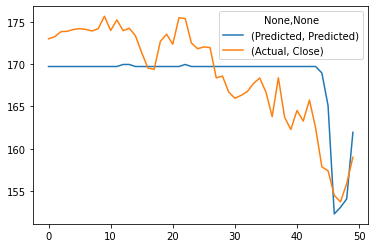

In [30]:
graph.plot(kind='line')


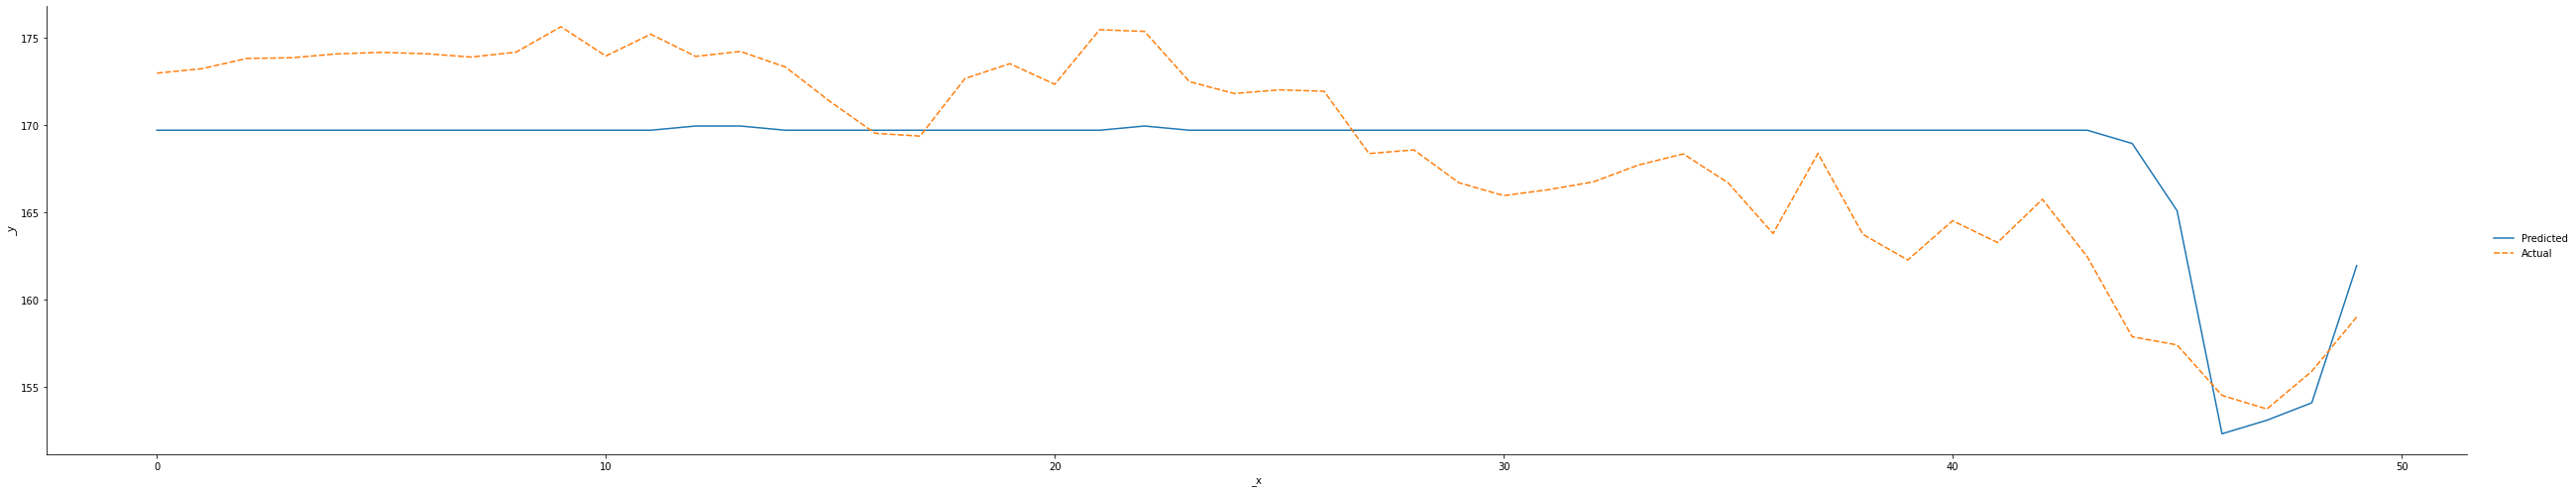

In [31]:
import seaborn as sns
sns.relplot(data=graph, kind="line", height=7, aspect=5)

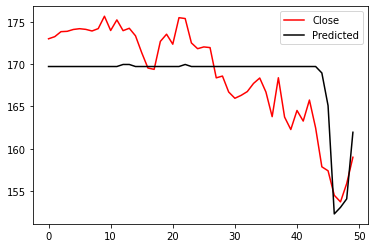

In [32]:
# Setup matplotlib
import matplotlib.pyplot as plt

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
graph.plot(kind='line', y='Actual', color='red', ax=axes,subplots=False)
graph.plot(kind='line', y='Predicted', color='black', ax=axes,subplots=False)


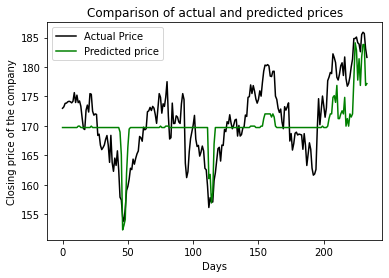

In [33]:
# plot the test predictions

plt.plot(actual, color='black',label='Actual Price')
plt.plot(predicted, color='green',label='Predicted price')
plt.title('Comparison of actual and predicted prices')
plt.xlabel('Days')
plt.ylabel('Closing price of the company')
plt.legend()
plt.show()

In [34]:
from datetime import timedelta

In [35]:
df_list = []
start='2022-01-01'
end='2022-12-31'
company = ['TSLA','FORD','RACE','BMWYY','MBGAF','AAPL','GOOG','META','AMZN','AAL']
for company_name in company:
    df = yf.download(company_name, start,end)
    df['company'] = company_name
    #df['company_encode'] = company_name
    df_list.append(df)
data = pd.concat(df_list)
data.reset_index(drop=False, inplace = True)
data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,TSLA
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,TSLA
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,TSLA
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,TSLA
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,TSLA
...,...,...,...,...,...,...,...,...
2335,2022-11-30,14.120000,14.450000,13.930000,14.430000,14.430000,21195200,AAL
2336,2022-12-01,14.460000,14.570000,13.930000,13.980000,13.980000,26519600,AAL
2337,2022-12-02,13.820000,13.980000,13.670000,13.970000,13.970000,24094600,AAL
2338,2022-12-05,13.840000,14.340000,13.820000,14.110000,14.110000,27029000,AAL


In [36]:
data.drop(['Adj Close','Close'], inplace=True, axis=1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [38]:
Ticker= input("Enter Ticker:")

Enter Ticker:TM


In [39]:
window_size=4
start='2022-01-01'
end='2022-12-15'

future_predictions =yf.download(Ticker, start,end)[-1*window_size:]

[*********************100%***********************]  1 of 1 completed


In [40]:
future_predictions.reset_index(drop=False, inplace = True)
future_predictions.drop(['Adj Close'], inplace=True, axis=1)
future_predictions

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Open,High,Low,Close,Volume
0,2022-12-01,147.220001,148.240005,146.580002,147.660004,199500
1,2022-12-02,145.559998,146.610001,144.990005,146.529999,164900
2,2022-12-05,144.759995,144.800003,142.649994,143.190002,223400
3,2022-12-06,142.880005,142.880005,140.199997,141.089996,242100


In [41]:
from datetime import date
future_predictions['Date']= pd.to_datetime(future_predictions['Date'])

for pred in range(10):
    
    future_predictions = future_predictions.append(
        {
            'Date' : future_predictions.at[len(future_predictions)-1,'Date'] + dt.timedelta(days=1), 
            'Close' : Random_forest.predict([future_predictions['Close'][-1*window_size:]])[0]
        }, 
        ignore_index=True
    )

<ipython-input-41-759ba7e73d80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_predictions['Date']= pd.to_datetime(future_predictions['Date'])
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:

In [42]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['Date'], y=df['Close'], mode='lines', name='Close'))

fig.add_trace(go.Scatter(x=future_predictions['Date'], y=future_predictions['Close'], mode='lines', name='Prediction'))

fig.show()

In [43]:
future_predictions.head(15)

,Date,Open,High,Low,Close,Volume
0,2022-12-01,147.220001,148.240005,146.580002,147.660004,199500.0
1,2022-12-02,145.559998,146.610001,144.990005,146.529999,164900.0
2,2022-12-05,144.759995,144.800003,142.649994,143.190002,223400.0
3,2022-12-06,142.880005,142.880005,140.199997,141.089996,242100.0
4,2022-12-07,NaN,NaN,NaN,144.329550,NaN
5,2022-12-08,NaN,NaN,NaN,144.329550,NaN
6,2022-12-09,NaN,NaN,NaN,144.329550,NaN
7,2022-12-10,NaN,NaN,NaN,144.329550,NaN
8,2022-12-11,NaN,NaN,NaN,144.329550,NaN
9,2022-12-12,NaN,NaN,NaN,144.329550,NaN
